In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [2]:
BATCH_SIZE = 64
N_EPOCH = 100
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2
N_RUNS = 3
histories = []
test_scores = []

print('Main variables initialised.')

Main variables initialised.


In [3]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [4]:
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=VALIDATION_SPLIT
)

datagen.fit(input_X_train)

train_generator = datagen.flow(
    input_X_train, output_Y_train,
    batch_size=BATCH_SIZE,
    subset='training'
    )

val_generator = datagen.flow(
    input_X_train, output_Y_train,
    batch_size=BATCH_SIZE,
    subset='validation'
)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [47]:
for run in range(N_RUNS):
    print(f"\nTraining Run {run+1}/{N_RUNS}")
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.6))
    
    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.6))
    
    model.add(Flatten())
    model.add(Dropout(0.6))
    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))
    
    OPTIM1 = Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM1, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
    )
    
    history = model.fit(
        train_generator,
        epochs=N_EPOCH,
        validation_data=val_generator,
        verbose=VERBOSE,
        callbacks=[early_stopping]
    )
    histories.append(history.history)
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    test_scores.append(score)
    print(f"Test results for Run {run+1}: Loss = {score[0]:.4f}, Accuracy = {score[1]:.4f}")


Training Run 1/3
Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0126 - loss: 7.9835 - val_accuracy: 0.0333 - val_loss: 4.5016
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0173 - loss: 5.5038 - val_accuracy: 0.0479 - val_loss: 4.3892
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0260 - loss: 5.0702 - val_accuracy: 0.0640 - val_loss: 4.2434
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0400 - loss: 4.7575 - val_accuracy: 0.0825 - val_loss: 4.0631
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0557 - loss: 4.5356 - val_accuracy: 0.1073 - val_loss: 3.9776
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0761 - loss: 4.3268 - val_accuracy: 0.1275 - val_loss: 3.9849
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0896 - loss: 4.1139 - val_accuracy: 0.1651 - val_loss: 3.5465
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.118

In [48]:
avg_test_loss = sum(s[0] for s in test_scores) / N_RUNS
avg_test_accuracy = sum(s[1] for s in test_scores) / N_RUNS
print(f"\nAverage Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy:.4f}")

min_epochs = min(len(history['accuracy']) for history in histories)

avg_train_acc = [0] * min_epochs
avg_val_acc = [0] * min_epochs
avg_train_loss = [0] * min_epochs
avg_val_loss = [0] * min_epochs

for epoch in range(min_epochs):
    for history in histories:
        avg_train_acc[epoch] += history['accuracy'][epoch]
        avg_val_acc[epoch] += history['val_accuracy'][epoch]
        avg_train_loss[epoch] += history['loss'][epoch]
        avg_val_loss[epoch] += history['val_loss'][epoch]
        
    avg_train_acc[epoch] /= N_RUNS
    avg_val_acc[epoch] /= N_RUNS
    avg_train_loss[epoch] /= N_RUNS
    avg_val_loss[epoch] /= N_RUNS


Average Test Loss: 1.6671
Average Test Accuracy: 0.5459


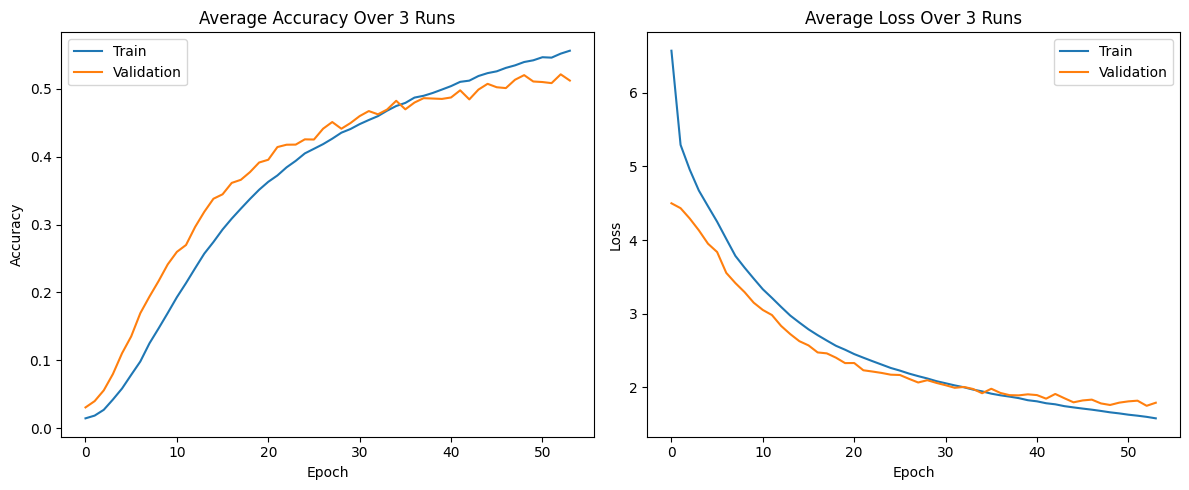

In [49]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_train_acc, label='Train')
plt.plot(avg_val_acc, label='Validation')
plt.title('Average Accuracy Over 3 Runs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(avg_train_loss, label='Train')
plt.plot(avg_val_loss, label='Validation')
plt.title('Average Loss Over 3 Runs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()